In [1]:
# DATa Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
hart=pd.read_csv('heart.csv')
hart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [2]:
# type of data logistic regration 
hart.isnull().sum().sum()

0

In [3]:
# cake the type of dataset
hart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
hart.describe() # logistic regaration type is binary logistic regration

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
print(hart.columns)
hart.head()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
hart=pd.get_dummies(hart,columns=['Sex'],drop_first=True)



In [7]:
hart.head()
hart.rename(columns={'Sex_M':'Sex'},inplace=True)

In [8]:
hart.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [9]:
hart=pd.get_dummies(hart,columns=['ST_Slope'],drop_first=True)
hart.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex,ST_Slope_Flat,ST_Slope_Up
0,40,ATA,140,289,0,Normal,172,N,0.0,0,1,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,1,0,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,0,1,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,1,0,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,0,1,0,1


In [10]:
hart.drop('ST_Slope_Flat',axis=1,inplace=True)

In [11]:
hart.rename(columns={'ST_Slope_Up':'ST_Slope'},inplace=True)

In [12]:
hart=pd.get_dummies(hart,columns=['ExerciseAngina'],drop_first=True)

In [13]:
hart.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease,Sex,ST_Slope,ExerciseAngina_Y
0,40,ATA,140,289,0,Normal,172,0.0,0,1,1,0
1,49,NAP,160,180,0,Normal,156,1.0,1,0,0,0
2,37,ATA,130,283,0,ST,98,0.0,0,1,1,0
3,48,ASY,138,214,0,Normal,108,1.5,1,0,0,1
4,54,NAP,150,195,0,Normal,122,0.0,0,1,1,0


In [14]:
hart.rename(columns={'ExerciseAngina_Y':'ExerciseAngina'},inplace=True)

In [15]:
hart.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease,Sex,ST_Slope,ExerciseAngina
0,40,ATA,140,289,0,Normal,172,0.0,0,1,1,0
1,49,NAP,160,180,0,Normal,156,1.0,1,0,0,0
2,37,ATA,130,283,0,ST,98,0.0,0,1,1,0
3,48,ASY,138,214,0,Normal,108,1.5,1,0,0,1
4,54,NAP,150,195,0,Normal,122,0.0,0,1,1,0


In [16]:
hart.drop(columns=['RestingECG'],inplace=True)
hart.drop(columns=['ChestPainType'],inplace=True)


In [17]:
hart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ST_Slope,ExerciseAngina
0,40,140,289,0,172,0.0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,0
2,37,130,283,0,98,0.0,0,1,1,0
3,48,138,214,0,108,1.5,1,0,0,1
4,54,150,195,0,122,0.0,0,1,1,0


(array([547.,   0., 371.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

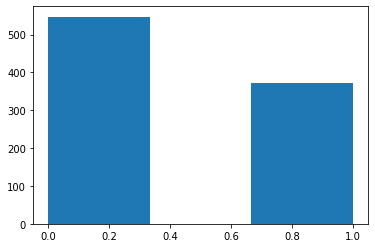

In [18]:
hart.head(10)
x=hart.ExerciseAngina
y=hart.HeartDisease
plt.hist(x,3)



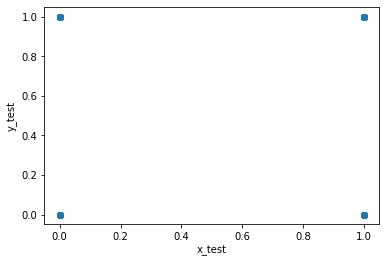

In [19]:
plt.scatter(x,y)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

In [22]:
print(hart.columns)
cormat=hart.corr()
cormat

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex', 'ST_Slope', 'ExerciseAngina'],
      dtype='object')


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ST_Slope,ExerciseAngina
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.055750,-0.258067,0.215793
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.005133,-0.096146,0.155101
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.200092,0.094027,-0.034166
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.120076,-0.161730,0.060451
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.189186,0.383397,-0.370425
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.105734,-0.450577,0.408752
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.305445,-0.622164,0.494282
Sex,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,1.000000,-0.150942,0.190664
ST_Slope,-0.258067,-0.096146,0.094027,-0.161730,0.383397,-0.450577,-0.622164,-0.150942,1.000000,-0.455676
ExerciseAngina,0.215793,0.155101,-0.034166,0.060451,-0.370425,0.408752,0.494282,0.190664,-0.455676,1.000000


In [23]:
# spliting the datasets
# selecting feature
y=hart.HeartDisease
print(y)
feature_var=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','Sex', 'ST_Slope', 'ExerciseAngina']
x=hart[feature_var]
x

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ST_Slope,ExerciseAngina
0,40,140,289,0,172,0.0,1,1,0
1,49,160,180,0,156,1.0,0,0,0
2,37,130,283,0,98,0.0,1,1,0
3,48,138,214,0,108,1.5,0,0,1
4,54,150,195,0,122,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0
914,68,144,193,1,141,3.4,1,0,0
915,57,130,131,0,115,1.2,1,0,1
916,57,130,236,0,174,0.0,0,0,0


In [24]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.07865396 0.08588347 0.12110986 0.04282345 0.09529115 0.08688246
 0.04756575 0.3870883  0.0547016 ]


In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   RestingBP       918 non-null    int64  
 2   Cholesterol     918 non-null    int64  
 3   FastingBS       918 non-null    int64  
 4   MaxHR           918 non-null    int64  
 5   Oldpeak         918 non-null    float64
 6   Sex             918 non-null    uint8  
 7   ST_Slope        918 non-null    uint8  
 8   ExerciseAngina  918 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 45.8 KB


In [26]:
#spliting Datatype
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print(X_train)
len(X_train)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex  ST_Slope  \
378   70        140            0          1    157      2.0    1         0   
356   46        115            0          0    113      1.5    1         0   
738   65        160          360          0    151      0.8    0         1   
85    66        140          139          0     94      1.0    1         0   
427   59        140            0          0    117      1.0    1         0   
..   ...        ...          ...        ...    ...      ...  ...       ...   
835   54        110          239          0    126      2.8    1         0   
192   48        130          245          0    160      0.0    1         1   
629   57        128          303          0    159      0.0    0         1   
559   64        134          273          0    102      4.0    1         0   
684   47        108          243          0    152      0.0    1         1   

     ExerciseAngina  
378               1  
356               1

734

# modal development and prediction

In [27]:
# import class
from sklearn.linear_model import LogisticRegression
# instance modal using defeault parmaetr
logreg=LogisticRegression()
# fit the modal using data
logreg.fit(X_train,y_train)
Y_pred=logreg.predict(X_test)
Y_pred

C:\Users\Ankush Niwane\anaconda3\envs\carprediction12\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

# model Evaluation Using Confusion matrix

In [28]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,Y_pred)
cnf_matrix

array([[63, 14],
       [14, 93]], dtype=int64)

Text(0.5, 257.44, 'predicted label')

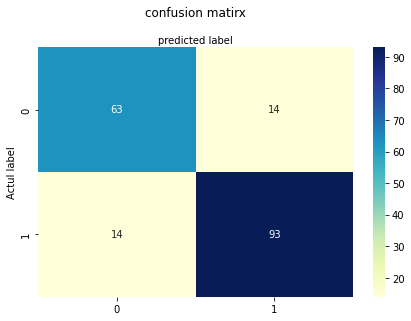

In [29]:

class_name=[0,1]
fig,ax=plt.subplots()
tick_mark=np.arange(len(class_name))


plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
# creating head map
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion matirx',y=1.1)
plt.ylabel('Actul label')
plt.xlabel('predicted label')

# confusion matrix Evalution matrics

In [30]:
print('accuracy',metrics.accuracy_score(y_test,Y_pred))


print('prision',metrics.precision_score(y_test,Y_pred))

print('recall',metrics.recall_score(y_test,Y_pred))

accuracy 0.8478260869565217
prision 0.8691588785046729
recall 0.8691588785046729


# well we got classicification of 84% and consider as good accuracy
# precision mean how accuracy your models amodel mark a prediction how often if correct
#recall identienty the time

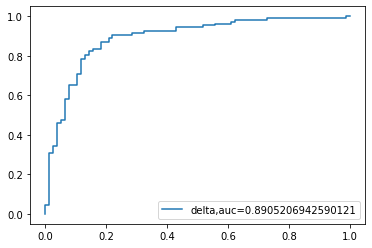

In [31]:
# Roc: reciver operating charatertics
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='delta,auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [1]:
from imblearn.over_sampling import RandomOverSampler